# Data fitting and regression

Before you start coding, please read the following notes on regression here:

https://github.com/wbandabarragan/computational-physics-1/blob/main/extra-notes/notes-regression.pdf

The steps you need to follow to sucessfully carry out a meaningful regression are:

- Inspect the data (plot and look at it first).

- Check if the variables are correlated or if the relation is monotonic. Verify if you can linearise the data, i.e. if you can apply a change of variable and make a plot in which the relation looks linear.

- Propose a physically-motivated model for the data. The model should have free parameters.

- Find the free parameters of the model by fitting the data via a regression. A regression can be done via optimisation, e.g. by minimising a functional. A popular optimisation method is the method of least squares, see: https://en.wikipedia.org/wiki/Least_squares). Python has several tools to carry out regressions.


## Example 1:

Let us imagine we measure the thickness of a book for different number of pages. We count the number of pages (variable book pages) and use a Vernier to measure the thickness in units of $mm$.

Then, we save the experimental data into a file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/books.dat


In [1]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data input using Pandas

We need to inspect the data.

In [2]:
# We use Pandas.DF

df = pd.read_csv("./books.dat", sep = "\s+")

print(df)

    N  Pages  Thickness
0   1     10        3.0
1   2     20        4.5
2   3     30        5.5
3   4     40        7.0
4   5     50        8.0
5   6     60        9.0
6   7     70        9.5
7   8     80       11.1
8   9     90       12.0
9  10    100       12.9


In [3]:
# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(pages)
#print(thick)

### Plotting the data:

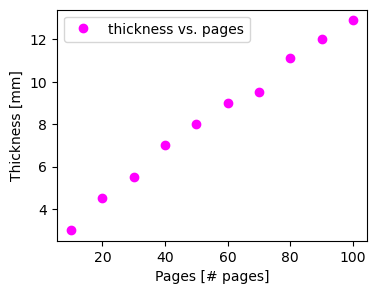

In [4]:
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(pages, thick, color = "magenta", marker = "o",\
        linestyle = " ", label = "thickness vs. pages")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Analising correlation and monotonicity:

### Spearman's coefficient

The Spearman correlation evaluates the monotonic relationship between 2 variables.

Linearity is not essential.

A monotonic relationship between 2 variables implies one of two situations:

- (Situation 1) As the value of one variable increases, so does the value of the other variable, OR,

- (Situation 2) As the value of one variable increases, the other variable value decreases.

Not necessarily at a constant rate.


### Pearson 'r' coefficient
The Pearson correlation coefficient (r) is an indicator of how strong a linear correlation between 2 variables is.

It can take values between -1 and 1.


#### To compute these oefficients, we need to import scipy:

conda install scipy

In [5]:
import scipy.stats as st

In [6]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick)

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick)

print("Spearman:\n", sp)

print("Pearson:\n", pe)


Spearman:
 SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)
Pearson:
 PearsonRResult(statistic=0.9967647822032425, pvalue=4.774249416992818e-10)


### Linear regression

We usually need a model when we want to perform a regression. In this case, it is reasonable to use a line since we expect the number of pages and the tickness are linearly correlated.

Our model is then:

$thickness = m(pages) + b$


Note that $m$ and $b$ have units of $mm/page$ and $mm$, respectively.

## Method 1. Using np.polyfit()

np.polyfit() returns the coefficients $m$ and $b$.
See the documentation here:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [7]:
# Get coeffcients - best fit parameters (LM method)

m, b = np.polyfit(pages, thick, 1)

In [8]:
# Print to check

print('slope =', m, ' intercept=', b)

slope = 0.10793939393939396  intercept= 2.313333333333331


In [9]:
# Get fitting function

fit_thick = m*pages + b

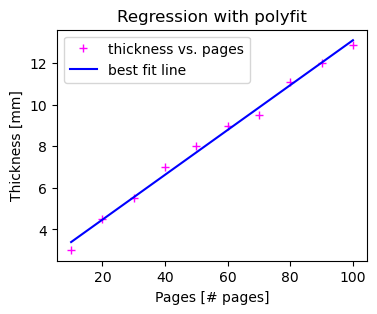

In [10]:
# replot  the data with the fit

# Figure environment
plt.figure(figsize = (4,3))

plt.title("Regression with polyfit")
plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Method 2. Using Scipy functions
The function curve_fit() from the scipy.optimize package can be used.

See documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [11]:
# Import the scipy library
import scipy.optimize as opt

In [12]:
# Define the model function to fit the data

def fit_model(x_values, m, b):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values + b
    
    return y_values


In [13]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, pages, thick)

# Double check
print(coef) # The fitting parameters (optimal)
print(type(coef)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

print(cova) # Covariance matrix

[0.10793939 2.31333333]
<class 'numpy.ndarray'>
thickness = 0.10794 * pages + 2.31333
[[ 9.46923799e-06 -5.20808091e-04]
 [-5.20808091e-04  3.64565662e-02]]


In [14]:
print(coef) # The fitting parameters (optimal)

# Use indexing
print(coef[0])
print(coef[1])

print(*coef)

[0.10793939 2.31333333]
0.10793939393744811
2.3133333333362254
0.10793939393744811 2.3133333333362254


In [15]:
# Define the fitting data
#fit_thick2 = fit_model(pages, coef[0], coef[1])

# Another way to get the fit data
fit_thick2 = fit_model(pages, *coef)

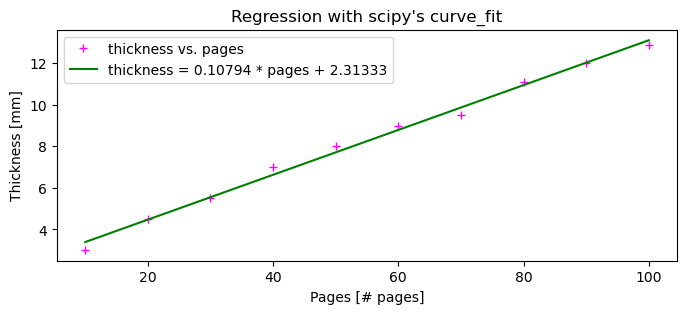

In [16]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (8,3))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = 'thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### Compute $1\sigma$ errors on the parameters

We can use:

perr = np.sqrt(np.diag(pcov))

In [17]:
print(cova)
print(cova.shape)

[[ 9.46923799e-06 -5.20808091e-04]
 [-5.20808091e-04  3.64565662e-02]]
(2, 2)


In [18]:
# Compute the errors

err= np.sqrt(np.diag(cova))

print("Error in m is %.5f" % (err[0]))
print("Error in b is %.5f" % (err[1]))
print("\n")
# Print result:
print('thickness = (%.5f +/- %.5f) * pages + (%.5f +/- %.5f)' % (coef[0], err[0], coef[1], err[1]))

Error in m is 0.00308
Error in b is 0.19094


thickness = (0.10794 +/- 0.00308) * pages + (2.31333 +/- 0.19094)


In [19]:
# Define the model function to fit the data

def fit_model2(x_values, m):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope
    Output: y_values (linear finction)
    """
    y_values = m * x_values
    
    return y_values

In [20]:
# Call the curve_fit() function
coef2, cova2 = opt.curve_fit(fit_model2, pages, thick)

# Double check
#print(cova2) # Covariance matrix
#print(coef2) # The fitting parameters (optimal)
#print(type(coef2)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages' % (coef2[0]))

thickness = 0.14099 * pages


In [21]:
print(coef, type(coef), len(coef))

print(coef[0], coef[1])
print(*coef)

[0.10793939 2.31333333] <class 'numpy.ndarray'> 2
0.10793939393744811 2.3133333333362254
0.10793939393744811 2.3133333333362254


In [22]:
# Define the fitting data
#fit_thick3 = fit_model(pages, coef[0])

# Another way to get the fit data
fit_thick3 = fit_model2(pages, *coef2)

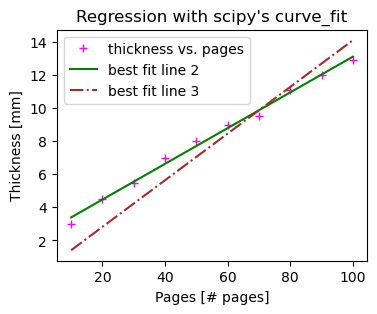

In [23]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (4,3))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line 2")

plt.plot(pages, fit_thick3, color = "brown",\
        linestyle = "-.", label = "best fit line 3")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Example 2: Free-fall experiment:

We wish to measure the acceleration of gravity based on data from a free-fall experiment in which we drop an object and measure the time it takes for it to reach different distanteces. The object starts from rest.

Data file: https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/data_freefall.csv

In [24]:
!cat data_freefall.csv

Time (s),Position (m)
0.0,0.0
0.5,2.0
1.0,5.2
1.5,9.8
2.0,19.7
2.5,31.2
3.0,44.4
3.5,57.8
4.0,80.8
4.5,100.4
5.0,121.1

In [25]:
# Use pandas to open the file and place the data into a DF

df_freefall = pd.read_csv("./data_freefall.csv", sep = ",")

print(df_freefall)

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


In [26]:
# Place the data into numpy arrays

time = np.array(df_freefall["Time (s)"])
ypos = np.array(df_freefall["Position (m)"])

print(ypos, time)

[  0.    2.    5.2   9.8  19.7  31.2  44.4  57.8  80.8 100.4 121.1] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


### Plotting:

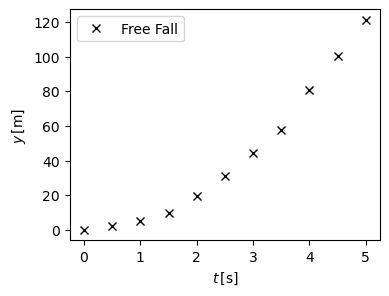

In [27]:
# Fig env:

plt.figure(figsize=(4,3))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall")

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

In [28]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, ypos)

# 2. Pearson coefficient
pe = st.pearsonr(time, ypos)

print("Spearman:\n", sp)

print("Pearson:\n", float(pe[0])**2)

Spearman:
 SignificanceResult(statistic=1.0, pvalue=0.0)
Pearson:
 0.9267708692052784


### 1st Approach:

We need a physically-motivated model;

$$y = \alpha\,t^2$$

where $\alpha= \frac{g}{2}$

## Scipy regression:

In [29]:
# Define our regression model

def fit_mruv(t_values, alpha):
    """
    Parabolic model with 1 free parameter.
    Inputs: t_values are the times, alpha = gravity/2
    Output: y_values
    """
    y_values = alpha*t_values**2
    
    return y_values

In [30]:
# Call the curve_fit function using our model

coef, cova = opt.curve_fit(fit_mruv, time, ypos)

# Print result:
print('y = %.5f * time^2' % (coef[0]))
print('g = %.5f' % (coef[0]*2))

y = 4.90276 * time^2
g = 9.80552


### Regression result:

In [31]:
# Evaluate the time using our regression model and alpha

ypos_fit = fit_mruv(time, *coef)


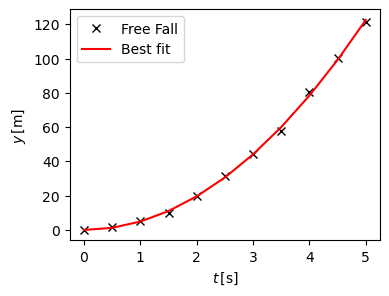

In [32]:
# Fig env:

plt.figure(figsize=(4,3))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall")

plt.plot(time, ypos_fit, color = "red", linestyle = "-", label = "Best fit")

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

### Calculation of the acceleration of gravity:

$$\alpha = \frac{g}{2}$$

In [33]:
# Calculate g

grav = coef[0]*2

# Print result:
print('g = %.5f m/s^2' % (grav))

g = 9.80552 m/s^2


In [34]:
print(type(cova))

<class 'numpy.ndarray'>


In [35]:
# Get the errors
grav_err = np.sqrt(np.diag(cova))[0]*2.
print(grav_err)

0.06487810029301236


In [36]:
# Print final result:
print('g = (%.5f +/- %.5f) m/s^2' % (grav, grav_err))

g = (9.80552 +/- 0.06488) m/s^2


## Goodness of fit test (Kolmogorov-Smirnov KS test):

- The KS test is designed to compare two independent data samples. In this case, your two samples will be your original experimental data and the data generated by your best-fit line.

- The ``scipy.stats.ks_2samp`` function takes two arrays as input and returns a ``KstestResult`` object, which contains the KS statistic and the p-value.

- The KS statistic measures the maximum distance between the cumulative distribution functions (CDFs) of the two samples. 

- The p-value indicates the probability that the two samples were drawn from the same distribution (null hypothesis). The p-value is the probability of obtaining results at least as extreme as the observed data, assuming the null hypothesis is true. If the p-value is high (typically >0.05), you do NOT reject the null hypothesis, meaning the samples are likely from the same distribution. If the p-value is low (below the significance level), you reject the null hypothesis (i.e. it indicates that the two samples are significantly different).

#### Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html


In [37]:
import scipy as sp

### For example 1 on the books:

In [38]:
# Cumulative distribvution functions (CDF)
thick_st = np.sort(thick)
fit_thick2_st = np.sort(fit_thick2)

# CDFs
thick_cdf = np.arange(1, len(thick_st) + 1)/len(thick_st) 
fit_thick2_cdf = np.arange(1, len(fit_thick2_st) + 1)/len(fit_thick2_st) 

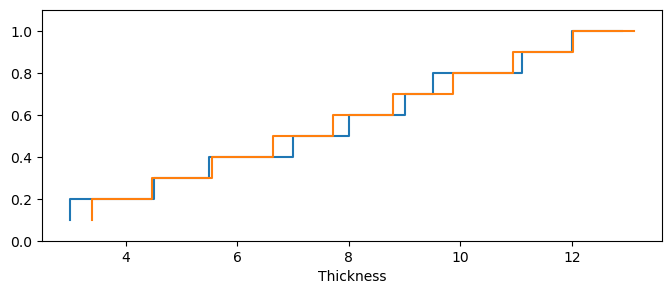

In [39]:
# Plotting the CDFs
plt.figure(figsize=(8,3))

plt.step(thick_st, thick_cdf)
plt.step(fit_thick2_st, fit_thick2_cdf)

plt.ylim(0,1.1)
plt.xlabel("Thickness")
plt.show()

In [40]:
ks_value, p_value = sp.stats.ks_2samp(thick, fit_thick2)

print("KS value is:", ks_value)
print("p-value is:", p_value)

KS value is: 0.1
p-value is: 1.0


### For example 2 on the free-fall experiment :

In [41]:
ks_value, p_value = sp.stats.ks_2samp(ypos, ypos_fit)

print("KS value is:", ks_value)
print("p-value is:", p_value)

KS value is: 0.09090909090909091
p-value is: 0.9999999999999999


## Example 3: Fitting spectral lines (advanced)

In this exercise we will be fitting Gaussian functions to spectral lines of the $\rm H_I$ transition of the Hydrogen atom. This is a forbidden transition that occurs as a result of its hyperfine structure.


Let us assume the spin of the p+ is down, then the $\rm H_I$ transition occurs when the spin of the electron flips from up to down (i.e. when going from anti-parallel to parallel). The spin up configuration has a slightly higher energy than the spin down because the magnetic dipole moments are parallel, so when it flips it releases a low-energy photon and goes into the spin down configuration, which has lower energy as the the magnetic dipole moments are anti-parallel.


**And some nice extra details from Wikipedia:**

"This transition is highly forbidden with an extremely small transition rate of $2.9\times 10^{-15}\,\rm s^{-1}$ and a mean lifetime of the excited state of around 10 million years. A spontaneous occurrence of the transition is unlikely to be seen in a laboratory on Earth, but it can be artificially induced using a hydrogen maser. It is commonly observed in astronomical settings such as hydrogen clouds in our galaxy and others. Because of its long lifetime, the line has an extremely small natural width, so most broadening is due to Doppler shifts caused by bulk motion or nonzero temperature of the emitting regions."

The transition.


- At 21 cm, 1.4 GHz.


- The data are taken from the GASS survey (shared via private communication).


- This survey uses the Parkes telescopes in Australia.


If you are interested in more information, I am leaving the links below:

Parkes: https://www.parkes.atnf.csiro.au/


Datafile: https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/104444.9-264831_gass_spectrum.txt

## 1. Data I/O:

In [42]:
# Let's place the data into a pandas DF

h1_df = pd.read_csv("./104444.9-264831_gass_spectrum.txt", sep = "\s+")

print(h1_df)

       velocity        Tb
0   -494.424011 -0.004997
1   -490.500011  0.010002
2   -486.576011  0.017502
3   -482.652011  0.027504
4   -478.728011 -0.014999
..          ...       ...
248  478.727995  0.002502
249  482.651995 -0.012497
250  486.575995  0.007500
251  490.499995 -0.017502
252  494.423995 -0.044998

[253 rows x 2 columns]


In [43]:
# Place the data columsn into arrays

h1_vel = np.array(h1_df["velocity"])
h1_int = np.array(h1_df["Tb"])

#print(h1_int)

## 2. Data inspection:

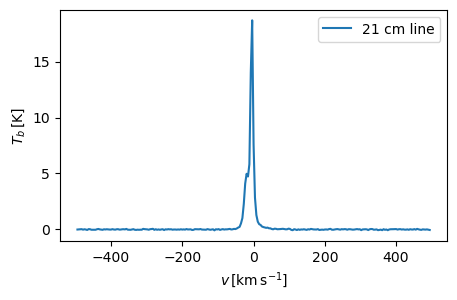

In [44]:
# Plotting: figure environment

plt.figure(figsize=(5,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.show()

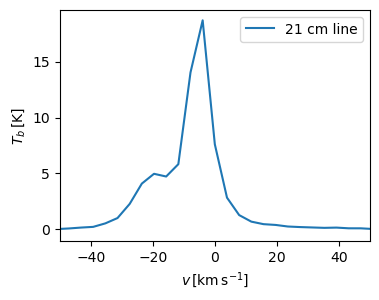

In [45]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

# A: First attempt

## 2. Regression model (1 Gaussian - bad model):

$$f(x) = a \exp\left( -b\,(x + c)^2 \right)$$


In [46]:
# Function for the Gaussian

def one_gaussian(x, a, b, c):
    """
    This defnes a 1-Gaussian model for the regression.
    This may not be the best model because we see 2 components.
    Inputs: x-> velocity vector, a in the height of the Gaussian,
            b-> is the width, c -> displacement
    Output: y -> 1D 1-Gaussian model
    """
    
    # 1D Gaussian
    y = a*np.exp(-b*(x + c)**2)
    
    return y

## 3. Optimisation using curve_fit:

- This step will tells us the values of a, b, and c that best fit the data.

In [47]:
# Regression with curve_fit

coef, cova = opt.curve_fit(one_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef)

print("The covariance matrix is:\n", cova)

Best-fit values are:
 [17.28888351  0.02146926  5.34294189]
The covariance matrix is:
 [[1.85376739e-01 3.06952782e-04 1.99793058e-06]
 [3.06952782e-04 1.52459486e-06 9.25827945e-09]
 [1.99793058e-06 9.25827945e-09 1.92585518e-02]]


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_60958/3295229245.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2)


### Regression uncertainties

In [48]:
# Calculate uncertainties
unc_param = np.sqrt(np.diag(cova))

print("The associated uncertainties are:\n", unc_param)

The associated uncertainties are:
 [0.43055399 0.00123474 0.13877518]


## 4. Plot the results:

In [49]:
# Evaluate our models using the best-fit params

h1_int_fit = one_gaussian(h1_vel, *coef)

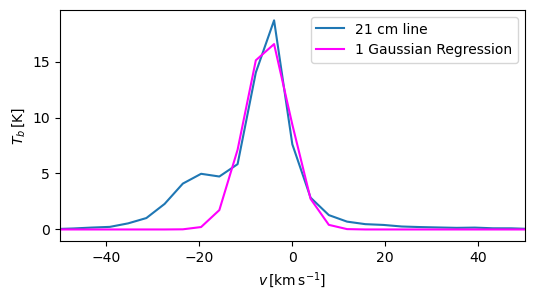

In [50]:
# Figure environment:

plt.figure(figsize=(6,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# Regression
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

# B: Second attempt

## 2. Regression model (2 Gaussians - good model):

$$f(x) = a \exp\left( -b\,(x + c)^2 \right) + d \exp\left( -e\,(x + f)^2 \right)$$


In [51]:
# Function for the Gaussian

def two_gaussian(x, a, b, c, d, e, f):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d are the heights of the
            Gaussians,
            b, e-> are the widths,
            c, f -> are the displacements
    Output: y -> 1D 2-Gaussian model
    """
    
    # 2D Gaussians
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)
    
    return y

## 3. Optimisation using curve_fit:

- This step will tells us the values of a, b, and c that best fit the data.

In [52]:
# Regression with curve_fit

coef2, cova2 = opt.curve_fit(two_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef2)

print("The covariance matrix is:\n", cova2)

Best-fit values are:
 [1.50333118e+01 5.59261976e-02 4.76060347e+00 5.34480760e+00
 3.33573089e-03 1.19768024e+01]
The covariance matrix is:
 [[ 1.43335788e-02 -2.35221027e-06  1.77892638e-04 -4.82966048e-03
  -1.56373946e-06  1.04165404e-02]
 [-2.35221027e-06  1.16534040e-06  3.83587645e-06  4.56198555e-05
   6.90229853e-09 -1.02060560e-04]
 [ 1.77892638e-04  3.83587645e-06  6.22394448e-04 -2.67949577e-04
  -5.93359139e-07 -8.21538565e-04]
 [-4.82966048e-03  4.56198555e-05 -2.67949577e-04  5.92454442e-03
   3.09881573e-06 -7.00841380e-03]
 [-1.56373946e-06  6.90229853e-09 -5.93359139e-07  3.09881573e-06
   5.70167745e-09 -1.10256106e-06]
 [ 1.04165404e-02 -1.02060560e-04 -8.21538565e-04 -7.00841380e-03
  -1.10256106e-06  3.33723893e-02]]


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_60958/227499923.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)


### Regression uncertainties


In [53]:
# Calculate uncertainties
unc_param2 = np.sqrt(np.diag(cova2))

print("The associated uncertainties are:\n", unc_param2)

The associated uncertainties are:
 [1.19722925e-01 1.07950933e-03 2.49478345e-02 7.69710622e-02
 7.55094527e-05 1.82681114e-01]


## 4. Plot the results:

In [54]:
# Evaluate our models using the best-fit params

h1_int_fit2 = two_gaussian(h1_vel, *coef2)

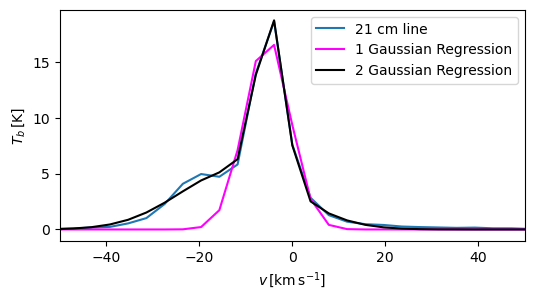

In [55]:
# Figure environment:

plt.figure(figsize=(6,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## 5. Replot with each component separately:

In [56]:
# Evaluate each Gaussian

gaussian_1 = one_gaussian(h1_vel, coef2[0], coef2[1], coef2[2])

gaussian_2 = one_gaussian(h1_vel, coef2[3], coef2[4], coef2[5])

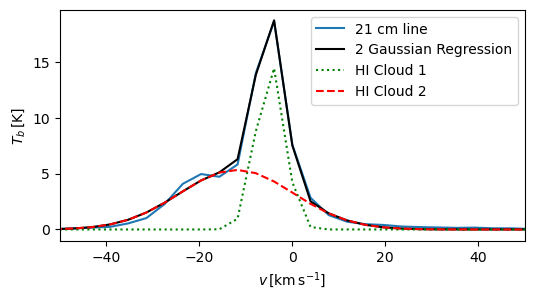

In [57]:
# Figure environment:

plt.figure(figsize=(6,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
#plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")

# Gaussian 1
plt.plot(h1_vel, gaussian_1, linestyle = ":", color = "green", label = "HI Cloud 1")

# Gaussian 2
plt.plot(h1_vel, gaussian_2, linestyle = "--", color = "red", label = "HI Cloud 2")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## 6. Summarise our findings:

In [58]:
print("The central velocity in km/s of the HI cloud 1 is: ", -coef2[2])

print("The central velocity on km /s of the HI cloud 2 is: ", -coef2[5])

print("The relative velocity between the HI clouds: ", abs(coef2[5]-coef2[2]))

The central velocity in km/s of the HI cloud 1 is:  -4.760603471924888
The central velocity on km /s of the HI cloud 2 is:  -11.97680238973316
The relative velocity between the HI clouds:  7.216198917808272


### Measuring velocity dispersions:

$$b=\frac{1}{2\sigma_v^2}$$

$$\sigma_v=\sqrt{\frac{1}{2b}}$$

In [59]:
# CLoud 1 dispersion 

sigma_v1 = np.sqrt(1./(2*coef2[1]))

# CLoud 2 dispersion 

sigma_v2 = np.sqrt(1./(2*coef2[4]))

print("The velocity dispersion in km/s of the HI cloud 1 is: ", sigma_v1)

print("The velocity dispersion in km /s of the HI cloud 2 is: ", sigma_v2)


The velocity dispersion in km/s of the HI cloud 1 is:  2.9900424625561057
The velocity dispersion in km /s of the HI cloud 2 is:  12.243046499726738
